<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Regression/Polynomial%20Lasso%20Ridge/Boston_House_Price_Prediction_Real_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.metrics import mean_squared_error

In [0]:
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

In [0]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [0]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [0]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
y = boston.target
y[:3]

array([24. , 21.6, 34.7])

In [0]:
df = pd.concat([X, pd.DataFrame(y, columns = ['Price'])], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **Check** skewness

In [0]:
df.skew()

CRIM       5.237578
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
Price      1.108098
dtype: float64

# Correlation (check)

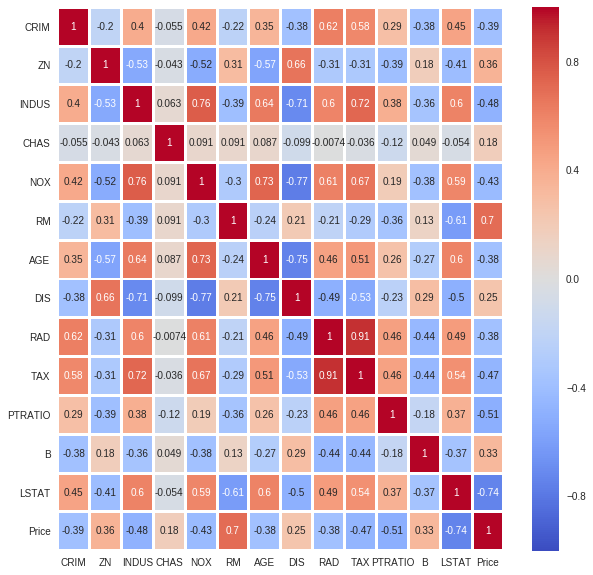

In [0]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths = 2)
plt.show()

**Output feature names which have multicollinearty**

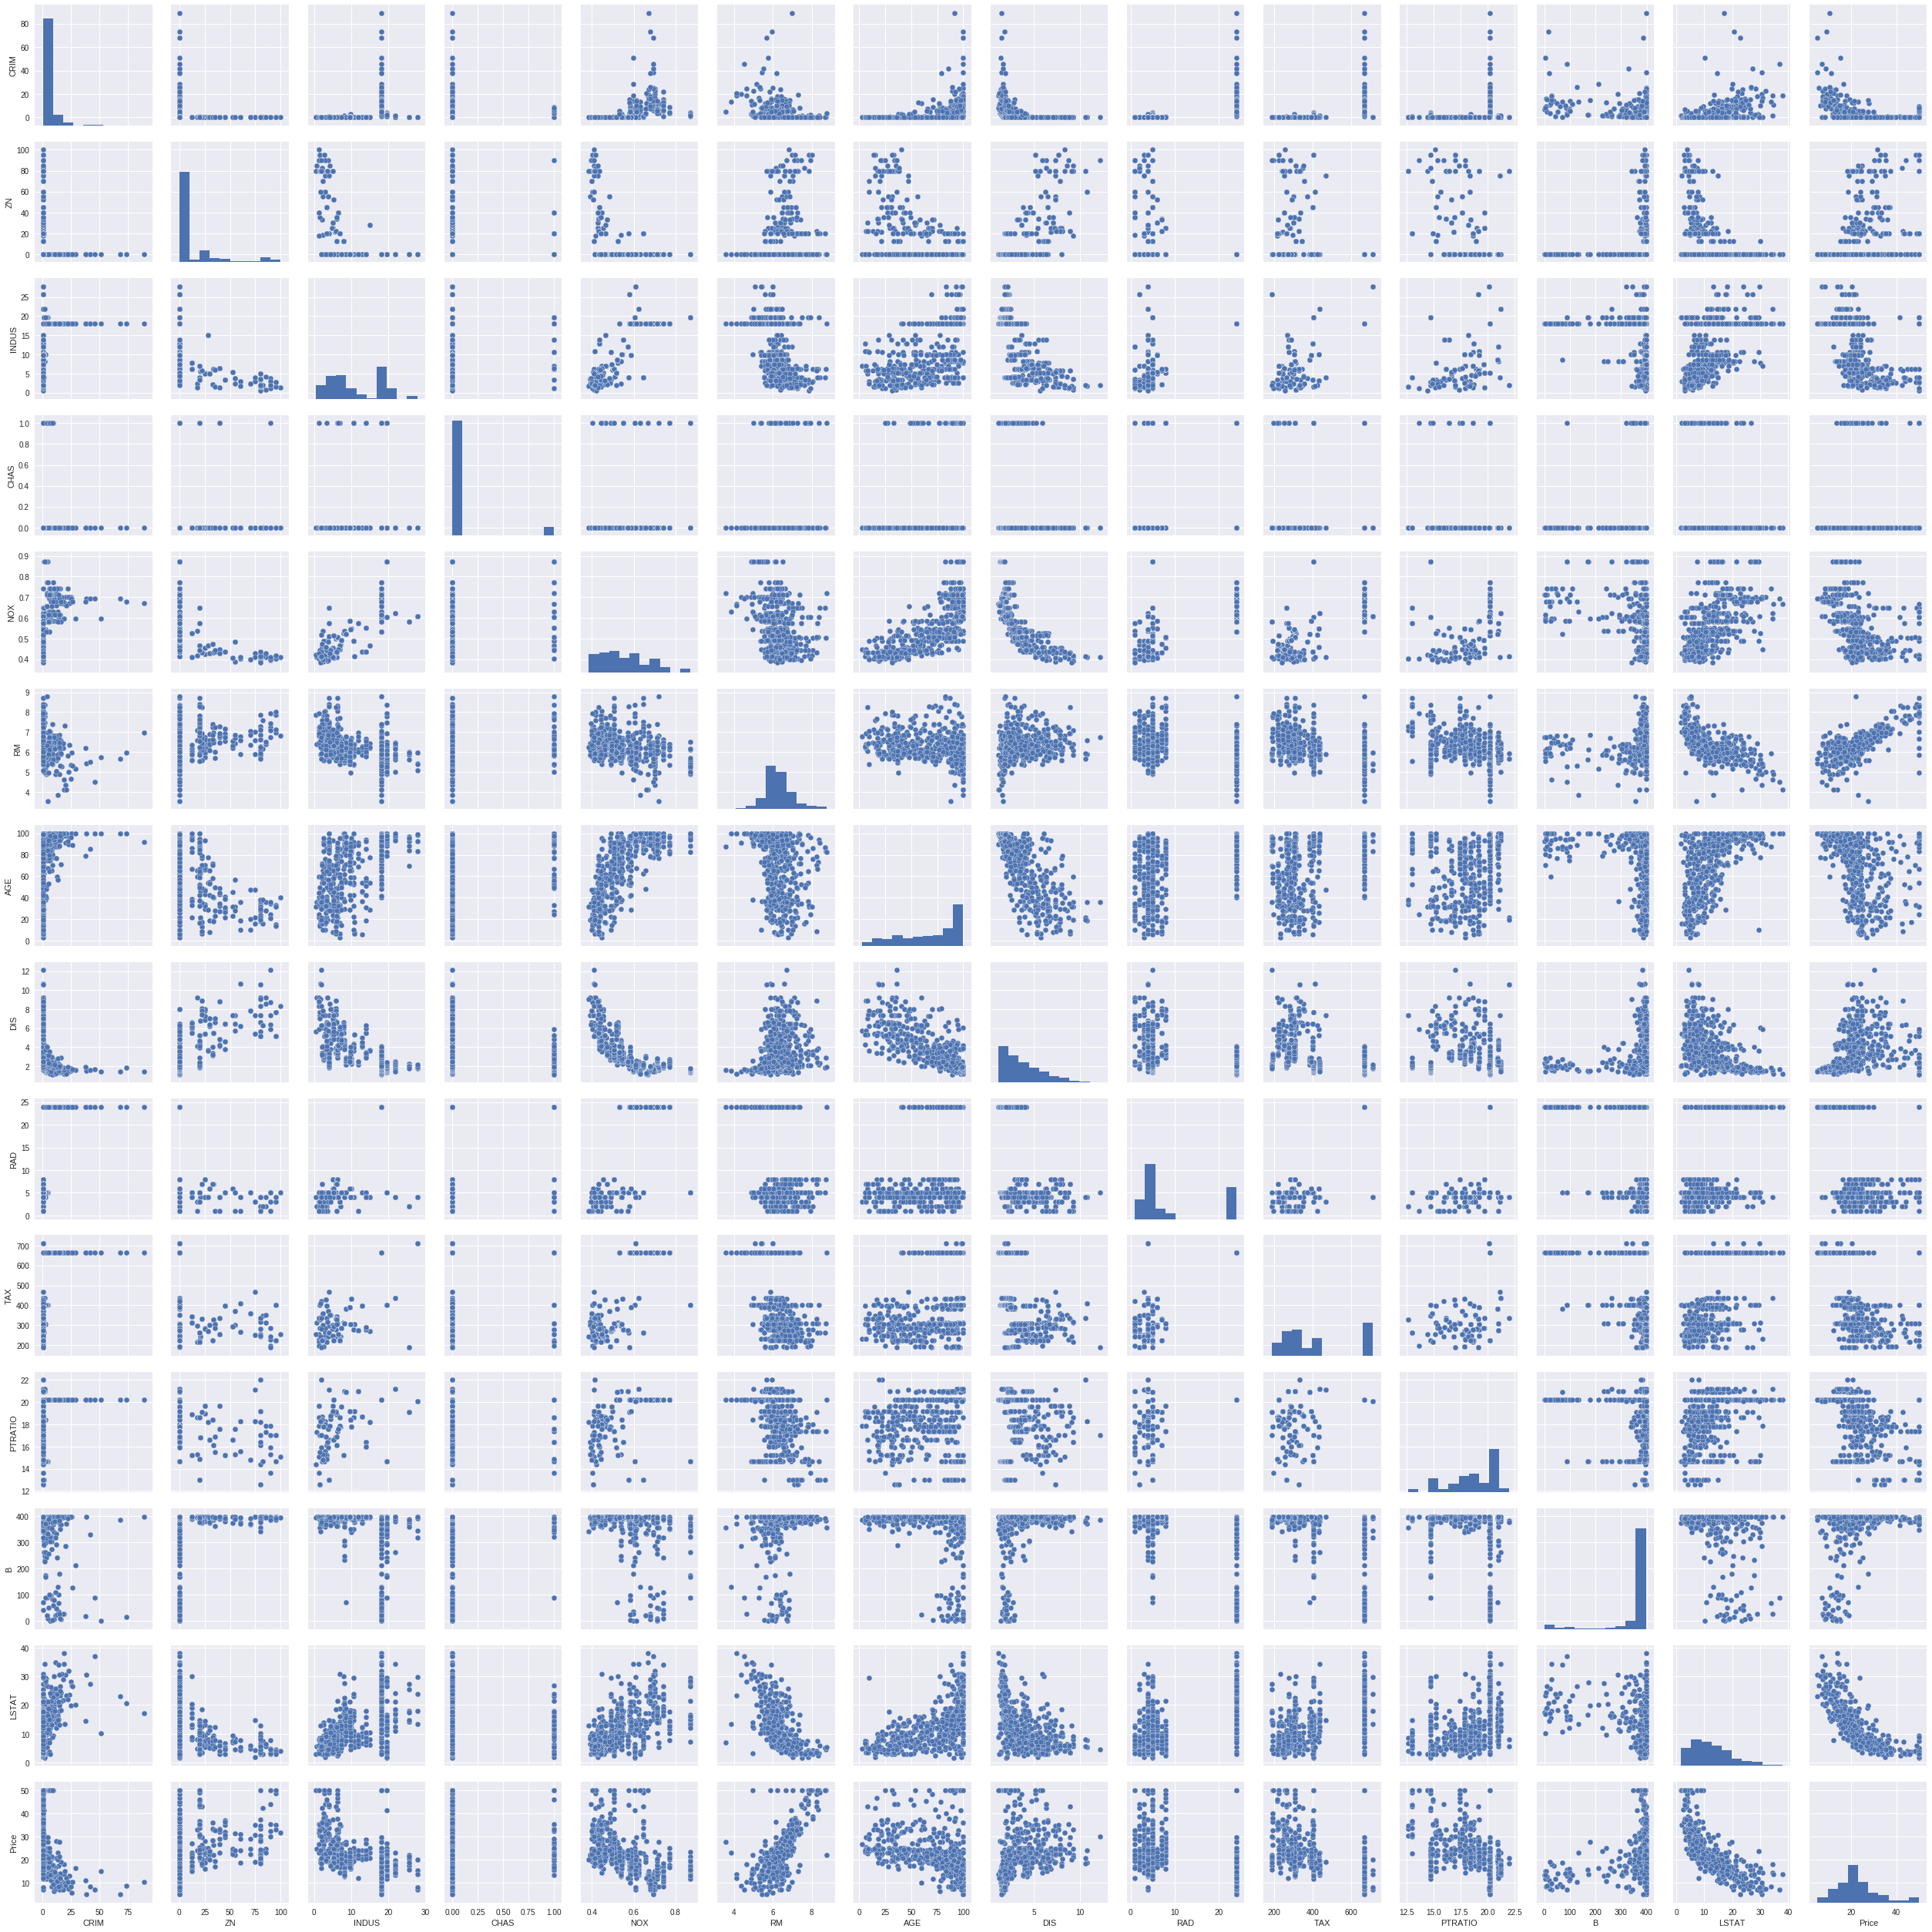

In [0]:
sns.pairplot(df)

In [0]:
df.corr()['Price'].sort_values(ascending = False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

# Outliers

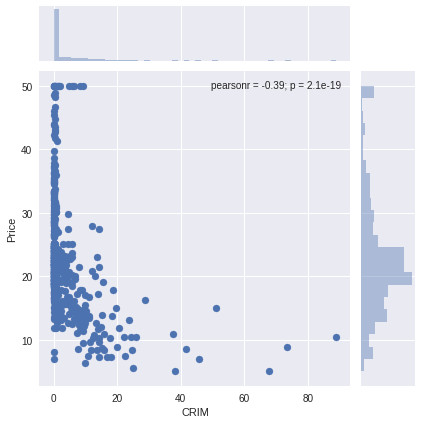

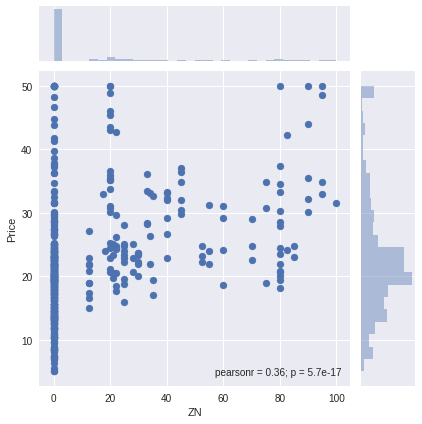

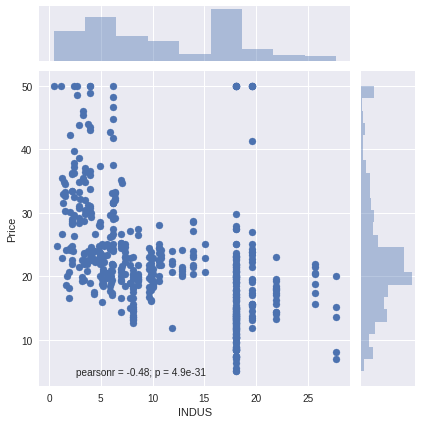

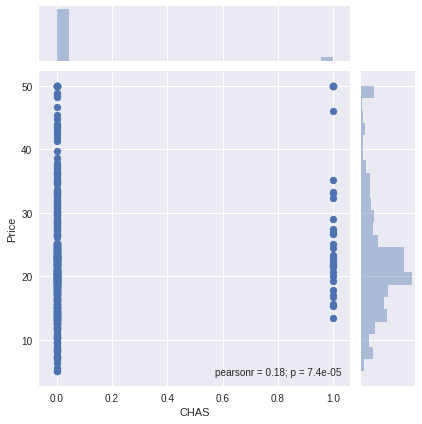

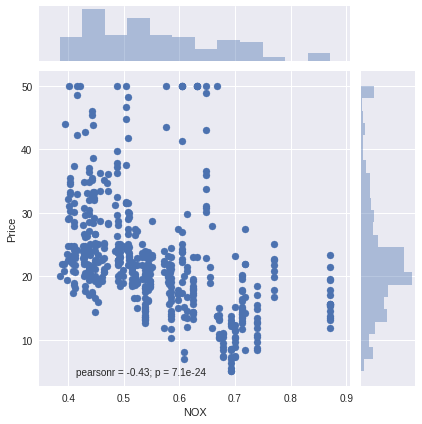

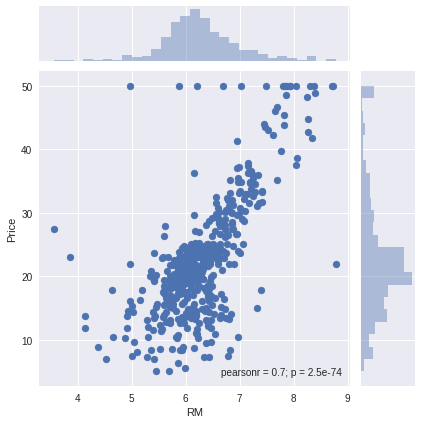

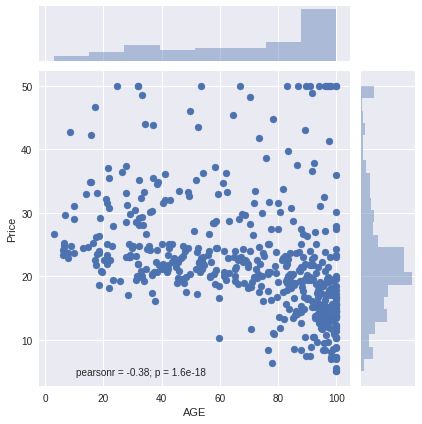

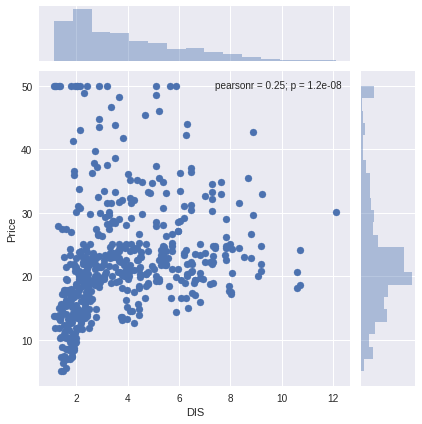

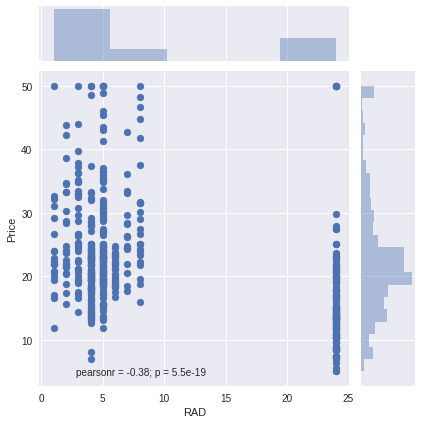

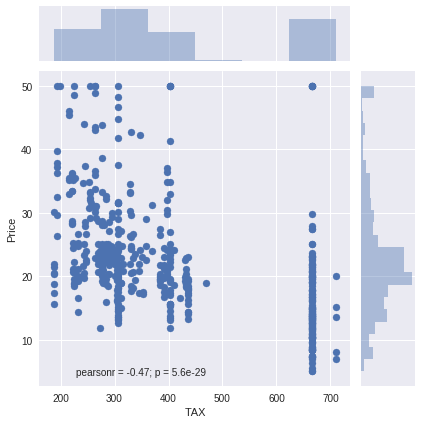

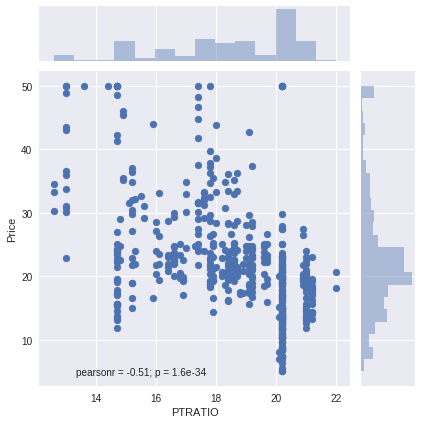

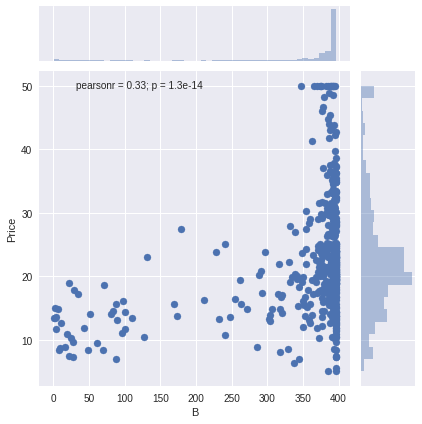

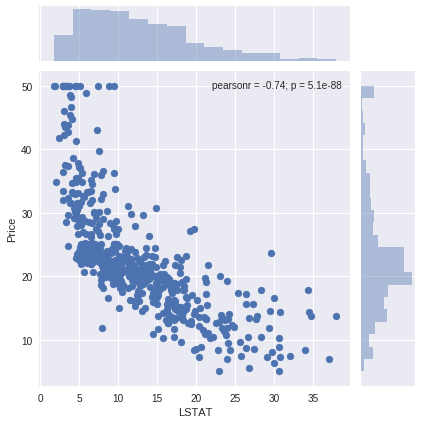

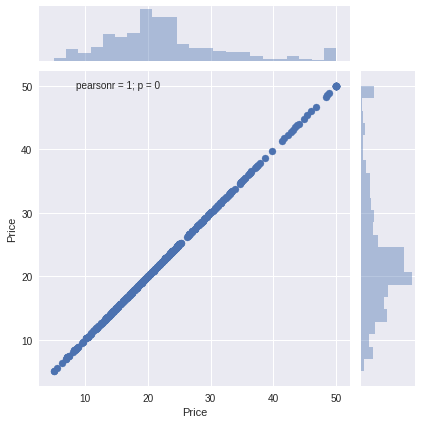

In [0]:
for i in df.columns:
  sns.jointplot(x = i, y = 'Price', data = df)
  plt.show()

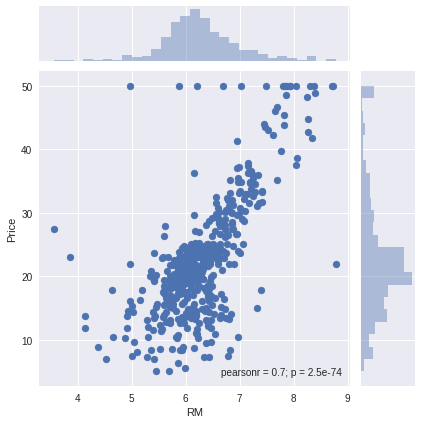

In [0]:
sns.jointplot(x = 'RM', y = 'Price', data = df)

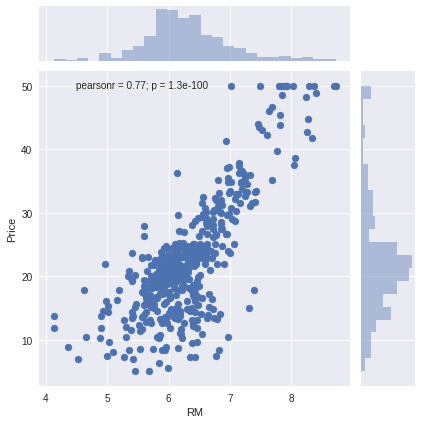

In [0]:
df = df[(df.RM != df.RM.max()) & (df.RM > 4) & ((df.Price < 45) | (df.RM > 7))]
sns.jointplot(x = 'RM', y = 'Price', data = df)

In [0]:
len(df)

499

In [0]:
X = df.drop('Price', 1)
X.shape

(499, 13)

In [0]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [0]:
y = df.Price
y[:3]

0    24.0
1    21.6
2    34.7
Name: Price, dtype: float64

In [0]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 0)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f' Train score is {lm.score(X_train, y_train)}')
print(f'Test score is {lm.score(X_test, y_test)}')

 Train score is 0.8449340322652072
Test score is 0.6717249259096211


In [0]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f' Train score is {lm.score(X_train, y_train)}')
print(f'Test score is {lm.score(X_test, y_test)}')

 Train score is 0.8449340322652072
Test score is 0.6717249259096211


In [0]:
cv = cross_val_score(LinearRegression().fit(X, y), X, y, cv = 10)
cv

array([ 0.80057018,  0.63411336,  0.32570063,  0.67761858,  0.75534661,
        0.80896937,  0.64454179, -0.07445456, -1.03748645,  0.37493719])

In [0]:
m1 = np.mean(cv)
m1

0.3909856697882466

# Polynomial Features

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = tts(X_poly, y, test_size = 0.3, random_state = 0)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f' Train score is {lm.score(X_train, y_train)}')
print(f'Test score is {lm.score(X_test, y_test)}')

 Train score is 0.948945593325195
Test score is 0.7152036205871142


# Polynomial with ridge regrssion

In [0]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = tts(X_poly, y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print(f' Train score is {ridge.score(X_train, y_train)}')
print(f'Test score is {ridge.score(X_test, y_test)}')

 Train score is 0.9580406432004076
Test score is 0.7780086996033335


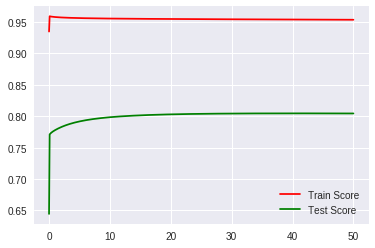

In [0]:
t = []
s = []
maxt = maxs = 0
n1 = 0
n2 = 0
x = np.linspace(0, 50, 500)
for i in x:
  ridge = Ridge(alpha = i)
  ridge.fit(X_train, y_train)
  a = ridge.score(X_train, y_train)
  b = ridge.score(X_test, y_test)
  if a > maxt:
    maxt = a
    n = i
    maxt = maxt
  if b > maxs:
    maxs  = b
    n2 = i
  t.append(a)
  s.append(b)
plt.plot(x ,t, label = 'Train Score', color = 'red')
plt.plot(x ,s, label = 'Test Score', color = 'g')
plt.legend()
#plt.grid()
plt.show() 

In [0]:
n, n2

(0.10020040080160321, 40.18036072144289)

In [0]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = n2)
ridge.fit(X_train, y_train)
print(f' Train score is {ridge.score(X_train, y_train)}')
print(f'Test score is {ridge.score(X_test, y_test)}')

 Train score is 0.9540506362445615
Test score is 0.8046528891689388


# Polynomial Features with Lasso Regressor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


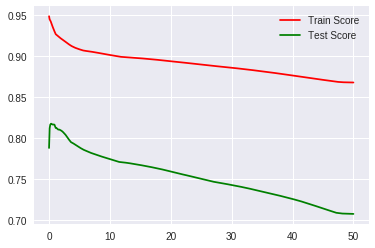

In [0]:
t = []
s = []
maxt = maxs = 0
n1 = 0
n2 = 0
x = np.linspace(0, 50, 500)
from sklearn.linear_model import Lasso
for i in x:
  lasso = Lasso(alpha = i)
  lasso.fit(X_train, y_train)
  a = lasso.score(X_train, y_train)
  b = lasso.score(X_test, y_test)
  if a > maxt:
    maxt = a
    n = i
    maxt = maxt
  if b > maxs:
    maxs  = b
    n2 = i
  t.append(a)
  s.append(b)
plt.plot(x ,t, label = 'Train Score', color = 'red')
plt.plot(x ,s, label = 'Test Score', color = 'g')
plt.legend()
#plt.grid()
plt.show() 

In [0]:
maxt, maxs

(0.9487983486606215, 0.8176587311495771)

In [0]:
n, n2

(0.0, 0.30060120240480964)

In [0]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = n2)
lasso.fit(X_train, y_train)
print(f' Train score is {lasso.score(X_train, y_train)}')
print(f'Test score is {lasso.score(X_test, y_test)}')

 Train score is 0.9420014300220366
Test score is 0.8176587311495771


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## After skewness of target variable(Polynomial Lasso Regressor)

In [0]:
y = df.Price

In [0]:
y.skew()

1.0727483775763058

In [0]:
y2 = np.sqrt(y)
y2.skew()

0.3942780043672333

In [0]:
X_train, X_test, y_train, y_test = tts(X_poly, y2, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((349, 105), (150, 105), (349,), (150,))

In [0]:
y_train.skew()

0.4115286696440289

In [0]:
y_test.skew()

0.3012603140280352

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


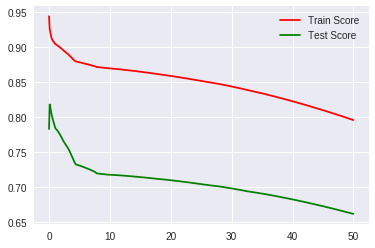

In [0]:
t = []
s = []
maxt = maxs = 0
n1 = 0
n2 = 0
x = np.linspace(0, 50, 500)
from sklearn.linear_model import Lasso
for i in x:
  lasso = Lasso(alpha = i)
  lasso.fit(X_train, y_train)
  a = lasso.score(X_train, y_train)
  b = lasso.score(X_test, y_test)
  if a > maxt:
    maxt = a
    n = i
    maxt = maxt
  if b > maxs:
    maxs  = b
    n2 = i
  t.append(a)
  s.append(b)
plt.plot(x ,t, label = 'Train Score', color = 'red')
plt.plot(x ,s, label = 'Test Score', color = 'g')
plt.legend()
#plt.grid()
plt.show() 

In [0]:
maxt, maxs, n, n2

(0.9445905921700708, 0.8182940198634374, 0.0, 0.10020040080160321)

In [0]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = n2)
lasso.fit(X_train, y_train)
print(f' Train score is {lasso.score(X_train, y_train)}')
print(f'Test score is {lasso.score(X_test, y_test)}')

 Train score is 0.9269281440381757
Test score is 0.8182940198634374


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


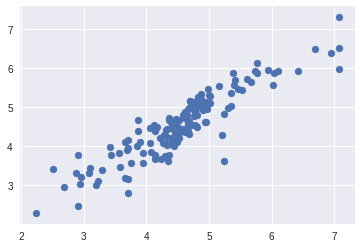

In [0]:
y_predicted = lasso.predict(X_test)
plt.scatter(y_test, y_predicted)

## Polynomial Lasso after normalization

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


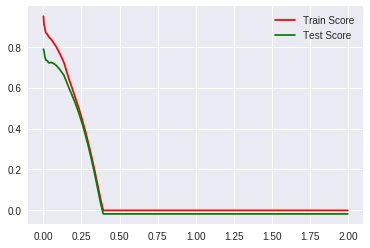

In [0]:
t = []
s = []
maxt = maxs = 0
n1 = 0
n2 = 0
x = np.linspace(0, 2, 500)
from sklearn.linear_model import Lasso
for i in x:
  lasso = Lasso(alpha = i, normalize = True)
  lasso.fit(X_train, y_train)
  a = lasso.score(X_train, y_train)
  b = lasso.score(X_test, y_test)
  if a > maxt:
    maxt = a
    n = i
    maxt = maxt
  if b > maxs:
    maxs  = b
    n2 = i
  t.append(a)
  s.append(b)
plt.plot(x ,t, label = 'Train Score', color = 'red')
plt.plot(x ,s, label = 'Test Score', color = 'g')
plt.legend()
#plt.grid()
plt.show() 

In [0]:
maxt, maxs, n, n2

(0.9487983486606214, 0.7881237613497588, 0.0, 0.0)

# ElasticNet Regressor

In [0]:
from sklearn.linear_model import ElasticNet

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


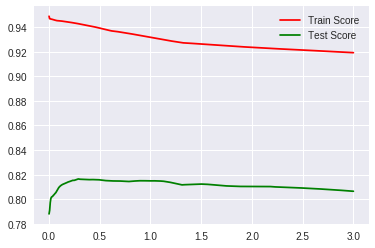

In [0]:
t = []
s = []
maxt = 0.0
maxs = 0.0
x = np.linspace(0, 3, 500)
for i in x:
  elastic = ElasticNet(alpha = i, l1_ratio = .8
               )
  elastic.fit(X_train, y_train)
  a = elastic.score(X_train, y_train)
  b = elastic.score(X_test, y_test)
  if a > maxt:
    maxt = a
    n = i
    maxt = maxt
  if b > maxs:
    maxs  = b
    n2 = i
  t.append(a)
  s.append(b)
plt.plot(x ,t, label = 'Train Score', color = 'red')
plt.plot(x ,s, label = 'Test Score', color = 'g')
plt.legend()
#plt.grid()
plt.show() 

In [0]:
maxt, maxs, n, n2

(0.9487983486606215, 0.8165389457756812, 0.0, 0.28857715430861725)

# After Skewness

In [0]:
df.skew()

CRIM       5.248262
ZN         2.202548
INDUS      0.327599
CHAS       3.569147
NOX        0.762380
RM         0.560978
AGE       -0.580007
DIS        1.005633
RAD        1.062776
TAX        0.712829
PTRATIO   -0.781186
B         -2.906587
LSTAT      0.895572
Price      1.072748
dtype: float64

In [0]:
df.CRIM.nunique()

497

In [0]:
df.B.nunique()

350

In [0]:
df.ZN.nunique()

26

In [0]:
def skew(a):
  x = np.sqrt(df[a])
  n = 0
  while True:
    if np.abs(x.skew()) <= 0.5 or n < 35:
      break
    else:
      n += 1
      x = np.sqrt(x)
      continue
  return x
    

In [0]:
X.skew()

CRIM       5.248262
ZN         2.202548
INDUS      0.327599
CHAS       3.569147
NOX        0.762380
RM         0.560978
AGE       -0.580007
DIS        1.005633
RAD        1.062776
TAX        0.712829
PTRATIO   -0.781186
B         -2.906587
LSTAT      0.895572
dtype: float64

In [0]:
b = skew('ZN')
b.skew()

1.4547671285002437

In [0]:
b = skew('CRIM')
b.skew()

2.0933011779360022

In [0]:
X2 = X.copy()

In [0]:
X2['CRIM'] = b
X2.skew()[:2]

CRIM    2.093301
ZN      2.202548
dtype: float64

In [0]:
b = skew('ZN')
b.skew()

1.4547671285002437

In [0]:
X2['ZN'] = b
X2.skew()[1:2]

ZN    1.454767
dtype: float64

In [0]:
X2.skew()

CRIM       2.093301
ZN         1.454767
INDUS      0.327599
CHAS       3.569147
NOX        0.762380
RM         0.560978
AGE       -0.580007
DIS        1.005633
RAD        1.062776
TAX        0.712829
PTRATIO   -0.781186
B         -2.906587
LSTAT      0.895572
dtype: float64

In [0]:
x = np.sqrt(df.Price)
x.skew()

0.3942780043672333

In [0]:
x  = np.sqrt(x)
x.skew()

0.022861818627738877

In [0]:
y2 = x
y2.skew()

0.022861818627738877

In [0]:
X2.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.079498,4.242641,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.165257,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [0]:
X2.skew()

CRIM       2.093301
ZN         1.454767
INDUS      0.327599
CHAS       3.569147
NOX        0.762380
RM         0.560978
AGE       -0.580007
DIS        1.005633
RAD        1.062776
TAX        0.712829
PTRATIO   -0.781186
B         -2.906587
LSTAT      0.895572
dtype: float64

In [0]:
y2.skew()

0.022861818627738877

# VIF(Variance Inflation factor) to check Multicollinearty in predictors(features)

### How to check: 
You can use scatter plot to visualize correlation effect among variables. Also, you can also use **VIF** factor. **VIF value <= 4** suggests no multicollinearity whereas a **value of >= 10** implies serious multicollinearity.

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
a = add_constant(X)
pd.Series([variance_inflation_factor(a.values, i) 
               for i in range(1, a.shape[1])], 
              index=a.columns[1:])

CRIM       1.773121
ZN         2.320261
INDUS      3.938422
CHAS       1.069322
NOX        4.408889
RM         2.264230
AGE        3.188325
DIS        3.939739
RAD        7.363192
TAX        8.743796
PTRATIO    1.800427
B          1.353400
LSTAT      3.504116
dtype: float64

^^As we can see **RAD and TAX** have multicollinearty so we need to drop one from them

In [0]:
df.corr().Price.sort_values(ascending = False)

Price      1.000000
RM         0.773781
ZN         0.387458
B          0.346135
DIS        0.293340
CHAS       0.146662
CRIM      -0.411571
AGE       -0.419422
RAD       -0.448048
NOX       -0.466589
INDUS     -0.532370
TAX       -0.534983
PTRATIO   -0.550553
LSTAT     -0.747114
Name: Price, dtype: float64

In [0]:
X2 = X.drop('RAD', axis = 1)
X_poly2 = PolynomialFeatures(2).fit_transform(X2)
X_poly2.shape

(499, 91)

In [0]:
X_train, X_test, y_train, y_test = tts(X_poly2, y, test_size = .3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((349, 91), (150, 91), (349,), (150,))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


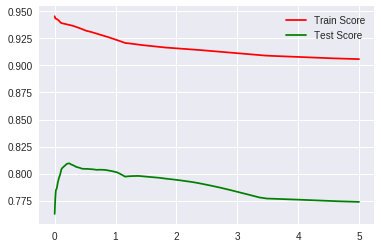

In [0]:
t = []
s = []
maxt = maxs = 0
n1 = 0
n2 = 0
x = np.linspace(0, 5, 500)
from sklearn.linear_model import Lasso
for i in x:
  lasso = Lasso(alpha = i)
  lasso.fit(X_train, y_train)
  a = lasso.score(X_train, y_train)
  b = lasso.score(X_test, y_test)
  if a > maxt:
    maxt = a
    n = i
    maxt = maxt
  if b > maxs:
    maxs  = b
    n2 = i
  t.append(a)
  s.append(b)
plt.plot(x ,t, label = 'Train Score', color = 'red')
plt.plot(x ,s, label = 'Test Score', color = 'g')
plt.legend()
#plt.grid()
plt.show() 

In [0]:
maxt, maxs

(0.9455233681995374, 0.8094124291492746)